# Topic

Describe the operation of the Miller-Rabin primality test and implement it. In the case where
this test returns <b>FALSE</b>, we are certain that the given number is composite – explain why.
Present the operation of the Miller-Rabin test on randomly generated numbers not smaller
than 105
(use the built-in function for generating pseudorandom numbers). Perform
this test enough times so that the probability of error is less than 10⁻⁶. Perform the examples
using the SageMath program. You can find some information on this topic in section 2.4 of the book https://wstein.org/ent/ent.pdf

In [2]:
DEFAULT_NUMBER_BOUND = (105, 10**6)
DEFAULT_TESTS = 10
DEFAULT_MAX_PROBABILITY = 10^-6

## Side Code

In [3]:
import sys
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import numpy as np

## What is Miller-Rabin Test?

The Miller–Rabin algorithm is a probabilistic primality test used to check whether a given integer n > 2 is likely to be prime. Unlike deterministic methods (e.g., trial division by all possible divisors), MR allows for very fast rejection of composite numbers with very high probability.

### General idea

1. For an odd number `n`, write `n - 1` in the form:

   $$
   n - 1 = 2^r\cdot d,\quad d\text{  is odd}.
   $$
   
2. Choose a random base `a` from the interval [2, n - 2] and compute:

   $$
   x = a^d mod n
   $$
   
3. If `x == 1` or `x == n - 1`, we consider that `a` does not disprove the primality of `n` and proceed to the next round.  
4. Otherwise, perform **s - 1** iterations:  
   - x = x^2 mod n  
   - If x == n - 1, we consider the round safe and continue.  
5. If in none of the steps x reaches the value n - 1, then `a` is a witness to compositeness and `n` is composite.

We repeat the test for **k** different random bases. If no round detects compositeness, we consider `n` to be **probably prime**.

---

## Implementation

### Miller-Rabin Test

#### SageMath

In [36]:
def millerRabinTest(n, k=DEFAULT_NUMBER_BOUND):
    """
    Miller–Rabin strong primality test:
    - n: number to be tested
    - k: number of rounds (the more, the lower the probability of error)
    Returns True if n is probably prime; False if compositeness is detected.
    """
    n = Integer(n)
    # 1) Simple cases
    if n < 2:
        return False         # everything < 2 is not prime
    if n in [2, 3]:
        return True          # 2 and 3 are prime
    if n % 2 == 0:
        return False         # even numbers > 2 are composite

    # 2) Decompose n-1 = 2^r * d
    r = (n-1).valuation(2)
    d = (n-1) // 2^r

    # 3) Run the test k times
    for _ in range(k):
        a = randint(2, n - 2)    # random base a ∈ [2, n-2]
        x = power_mod(a, d, n)   # a^d mod n (modular exponentiation)

        # 4) If immediately 1 or n-1, base does not disprove primality
        if x == 1 or x == n - 1:
            continue

        # 5) Check subsequent squares:
        #    Repeat r-1 times: x = x^2 mod n.
        #    If x ever becomes n-1, this base passes the test.
        for _ in range(r - 1):
            x = power_mod(x, 2, n)
            if x == n - 1:
                break
        else:
            # loop finished without break → witness of compositeness
            return False
        
    return True


#### Python

In [37]:
from random import randint

def millerRabinTestPython(n, k=DEFAULT_NUMBER_BOUND):
    # 1) Handle small and even numbers
    if n < 2:
        return False         # everything < 2 is not prime
    if n in (2, 3):
        return True          # 2 and 3 are prime
    if n % 2 == 0:
        return False         # all other even numbers are composite

    # 2) Decompose n-1 = 2^r * d, with odd d
    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1
    # now n-1 = 2^r * d

    # 3) Run the test k times
    for _ in range(k):
        a = randint(2, n - 2)    # random base a ∈ [2, n-2]
        x = pow(a, d, n)         # a^d mod n (built-in modular exponentiation)

        # 4) If immediately 1 or n-1, base does not disprove primality
        if x == 1 or x == n - 1:
            continue

        # 5) Check subsequent squares:
        #    Repeat r-1 times: x = x^2 mod n.
        #    If x ever becomes n-1, this base passes the test.
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # loop completed without break → witness of compositeness
            return False

    # 6) If no base detected compositeness → probably prime
    return True


### Miller-Rabin Test Probability
The probability is the number of bases that can reveal compositeness divided by the total number of possible bases in the range [2, n - 2], so there are n - 3 possible bases.

<b>[TODO] Explain what this code does</b>


In [38]:
def probabilityOfMillerRabinTest(number, tests):
  if (number < 2): raise ValueError("number can't be less then 3")
  factors = [a for a, _ in factor(number)]
  probability = len(factors)/((number - 2)**tests)
  return probability

In [39]:
def testsOfMillerRabinTestToSatisfyProbability(number, probability):
  factors = [a for a, _ in factor(number)]
  tests = math.log(len(factors) / probability) / math.log(number - 2)
  return math.ceil(tests)

<b>[TODO] explain this estimations</b>

In [40]:
def estimatedProbabilityForMillerRabinTest(tests):
  return (1/4)**tests

In [41]:
def estimatedTestForMillerRabinTestToSatisfyProbability(probability):
    if not (0 < probability < 1): raise ValueError("probability must be is (0,1)")
    tests = math.log(1/probability, 4)
    return math.ceil(tests)

## Random Number Test

In [42]:
NUMBER = randint(DEFAULT_NUMBER_BOUND[0], DEFAULT_NUMBER_BOUND[1])
TESTS = DEFAULT_TESTS
PROBABILITY = DEFAULT_MAX_PROBABILITY

### Test if number is prime

In [43]:
print("Number:", NUMBER)
print("Tests:", TESTS)

result = millerRabinTest(NUMBER, TESTS)
print("Is Prime?:", result)

Number: 487832
Tests: 10
Is Prime?: False


### Calculate probability for number and tests

In [44]:
probability = probabilityOfMillerRabinTest(NUMBER, TESTS)
estimated_probability = estimatedProbabilityForMillerRabinTest(TESTS)

print("Probability:" ,N(probability))
print("Estimated probability:" , N(estimated_probability))
print("Is probability less then estimated?", probability < estimated_probability)

Probability: 3.93039509713419e-57
Estimated probability: 9.53674316406250e-7
Is probability less then estimated? True


### Calculate tests for number and probability

In [45]:
tests = testsOfMillerRabinTestToSatisfyProbability(NUMBER, PROBABILITY)
estimated_tests = estimatedTestForMillerRabinTestToSatisfyProbability(PROBABILITY)
print("Tests:", tests)
print("Estimated Tests:", estimated_tests)
print("Are tests less then estimated tests?", tests < estimated_tests)

Tests: 2
Estimated Tests: 10
Are tests less then estimated tests? True


## Chart of that number is prime by tests

In [20]:
NUMBER_BOUND    = (4, 100_000) # e.g. from 2 to 100000
NUMBER_STEP     = 5000        # every 5000 numbers
TESTS           = 5            # example number of tests (for the top plots)
PROBABILITY     = 1e-9         # target probability (for the top plots)
PROBABILITY_BOUND = (1e-12, 1e-6) # probability range
PROBABILITY_STEP  = 2e-7       # step of 0.0000002

TESTS_BOUND = (1, 21)   # 1..20 inclusive

### Calculate Data and drawGraph function

In [21]:
# ─── UTILITY: factor out n−1 = 2^s⋅d ───────────────────────────────────────────────
def decompose(n):
    s = 0
    d = n - 1
    while (d % 2) == 0:
        d //= 2
        s += 1
    return s, d

# ─── “Is a single base a strong liar?” ───────────────────────────────────────────
def is_strong_liar(a, n, s, d):
    x = pow(a, d, n)
    if x == 1 or x == n - 1:
        return True
    for _ in range(s - 1):
        x = (x * x) % n
        if x == n - 1:
            return True
    return False

# ─── Count how many a∈{2,…,n−2} fool MR on this odd composite n≥3 ───────────────
def count_strong_liars(n):
    # if n<3 or even ⇒ return 0 immediately
    if n < 3 or (n % 2 == 0):
        return 0

    # quick primality check: if prime, return 0
    limit = int(math.isqrt(n))
    for p in range(2, limit + 1):
        if n % p == 0:
            break
    else:
        # no divisor ⇒ n is prime
        return 0

    # now n is definitely an odd composite
    s, d = decompose(n)
    liars = 0
    # test a=2..(n−2), i.e. range(2, n-1)
    for a in range(2, n - 1):
        if is_strong_liar(a, n, s, d):
            liars += 1
    return liars

# ─── 1) Exact failure‐probability if you pick k random bases in {2..n-2} ────────
def probabilityOfMillerRabinTest(n, k):
    # if n<3 or even ⇒ trivially caught ⇒ prob=0.0
    if n < 3 or (n % 2 == 0):
        return 0.0

    liars = count_strong_liars(n)
    total_bases = n - 3            # exactly |{2,3,…,n-2}| = n-3
    if total_bases <= 0 or liars == 0:
        return 0.0

    single_base_error = liars / total_bases
    return single_base_error ** k

# ─── 2) How many MR‐rounds k so that (liars/(n-3))^k ≤ target_p? ───────────────
def testsOfMillerRabinTestToSatisfyProbability(n, target_p):
    if n < 3 or (n % 2 == 0):
        return 0

    liars = count_strong_liars(n)
    total_bases = n - 3
    if liars == 0:
        # either prime or composite with zero strong‐liars ⇒ no rounds needed
        return 0

    ratio = liars / total_bases   # < 1
    kf = math.log(target_p, ratio) # solves (ratio)^k = target_p  ⇒ k = log(target_p)/log(ratio)
    return math.ceil(kf)

# ─── 3) Worst‐case bound: failure‐prob ≤ (1/4)^k ─────────────────────────────────
def estimatedProbabilityForMillerRabinTest(k):
    return 0.25 ** k

# ─── 4) Worst‐case “target ε” ⇒ minimal k satisfying (1/4)^k ≤ ε ───────────────────
def estimatedTestForMillerRabinTestToSatisfyProbability(target_p):
    if target_p <= 0:
        return 0
    kf = math.log(target_p, 0.25)
    return math.ceil(kf)

# ─── BUILD THE ODD “n”s TO PLOT ──────────────────────────────────────────────────
raw_numbers = list(range(NUMBER_BOUND[0], NUMBER_BOUND[1] + 1, NUMBER_STEP))
numbers = []
for n in raw_numbers:
    if n % 2 == 0:
        n += 1
    if n > NUMBER_BOUND[1]:
        continue
    numbers.append(n)
# now “numbers” = odd integers ≥3 at steps of 5000 (e.g. [3, 5001, 10001, 15001, …])

# ─── DATA FOR THE TOP TWO PANELS ─────────────────────────────────────────────────
probability_exact   = [probabilityOfMillerRabinTest(n, TESTS) for n in numbers]
tests_needed_exact  = [testsOfMillerRabinTestToSatisfyProbability(n, PROBABILITY) for n in numbers]

# ─── DATA FOR THE BOTTOM‐LEFT PANEL (1/4)^k, k=1..20 ────────────────────────────
test_values             = list(range(TESTS_BOUND[0], TESTS_BOUND[1], TESTS_STEP))
estimated_probabilities = [estimatedProbabilityForMillerRabinTest(k) for k in test_values]

# ─── DATA FOR THE BOTTOM‐RIGHT PANEL: k vs ε ∈ [1e-12..1e-6] ─────────────────────
probability_values = np.arange(
    PROBABILITY_BOUND[0],
    PROBABILITY_BOUND[1] + PROBABILITY_STEP,
    PROBABILITY_STEP
)
estimated_tests = [
    estimatedTestForMillerRabinTestToSatisfyProbability(eps)
    for eps in probability_values
]

In [24]:
def drawGraph():
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # ── Top‐Left  ──
    axes[0, 0].plot(numbers, probability_exact, 'o-', color='tab:blue')
    axes[0, 0].set_title(f"Exact MR‐failure probability for k = {TESTS} rounds")
    axes[0, 0].set_xlabel("n (odd ≥3)")
    axes[0, 0].set_ylabel("Pr[all k tests are fooled]")
    axes[0, 0].set_yscale('log')     
    axes[0, 0].grid(True, which='both', linestyle='--', alpha=0.5)

    # ── Top‐Right ──
    axes[0, 1].plot(numbers, tests_needed_exact, 'o-', color='tab:green')
    axes[0, 1].set_title(f"Minimum k so that failure ≤ {PROBABILITY:.1e}")
    axes[0, 1].set_xlabel("n (odd ≥3)")
    axes[0, 1].set_ylabel("k (# of MR‐bases needed)")
    axes[0, 1].grid(True, which='both', linestyle='--', alpha=0.5)

    # ── Bottom‐Left ──
    axes[1, 0].plot(test_values, estimated_probabilities, 'o-', color='tab:red')
    axes[1, 0].set_title("Worst‐case MR bound: P ≤ (¼)^k")
    axes[1, 0].set_xlabel("k (# of tests)")
    axes[1, 0].set_ylabel("Worst‐case failure P")
    axes[1, 0].set_yscale('log')  
    axes[1, 0].grid(True, which='both', linestyle='--', alpha=0.5)

    # ── Bottom‐Right ──
    axes[1, 1].plot(probability_values, estimated_tests, 'o-', color='tab:purple')
    axes[1, 1].set_title("Worst‐case k so that (¼)^k ≤ ε")
    axes[1, 1].set_xlabel("Target error ε")
    axes[1, 1].set_xscale('log')          
    axes[1, 1].set_ylabel("k (# of tests)")
    axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

### Draw Graph


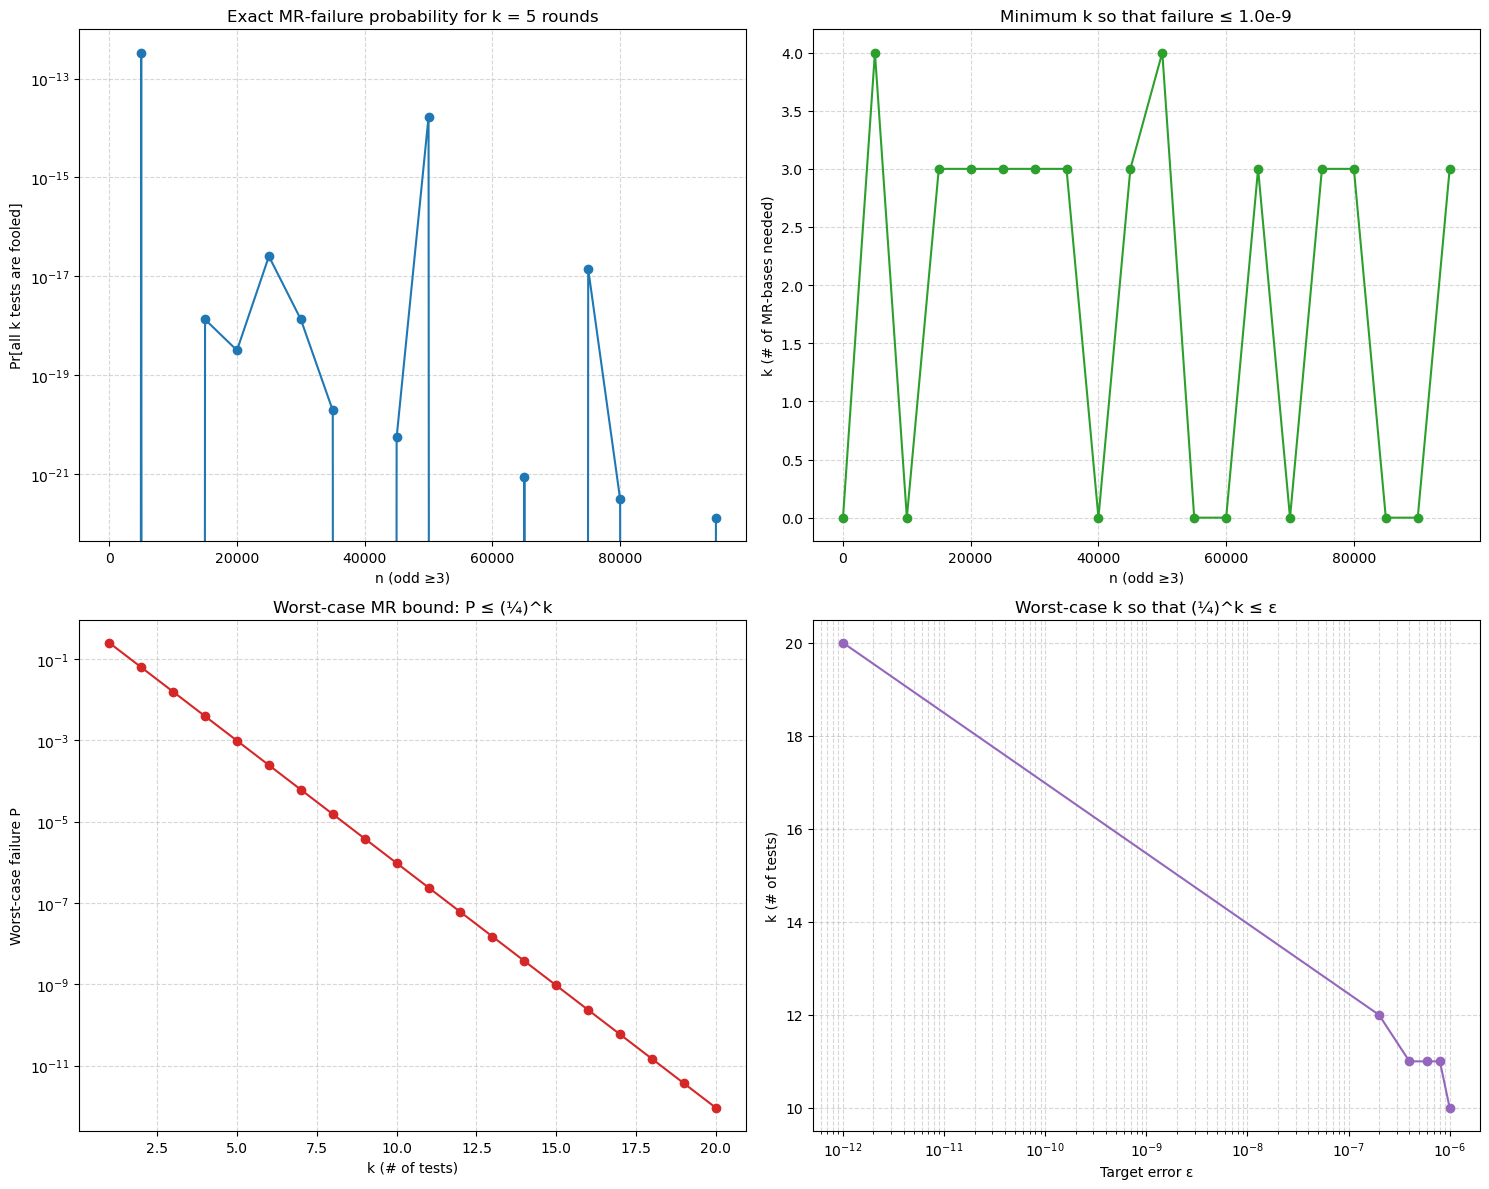

In [25]:
drawGraph()